In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_index=pd.read_csv('economic_index.csv')

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
## Dropping unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
## Checking empty values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

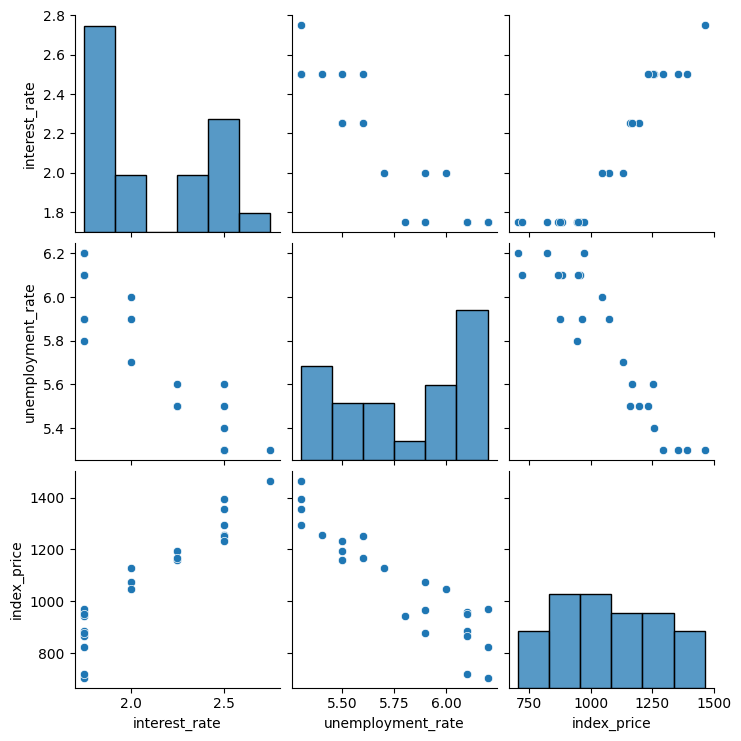

In [9]:
## Visualization
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

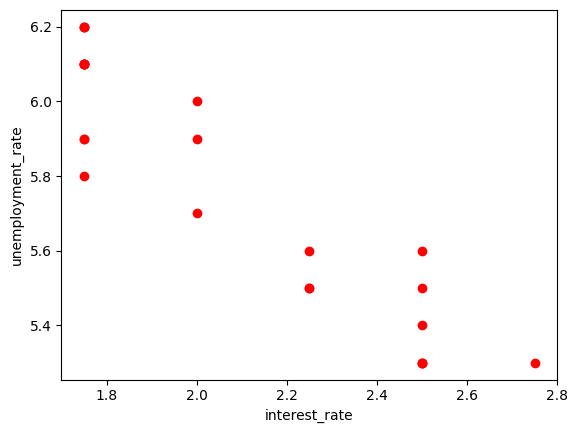

In [11]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')


In [12]:
## Dependent and Idependent variables
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [13]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [14]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [15]:
## train_test_split
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

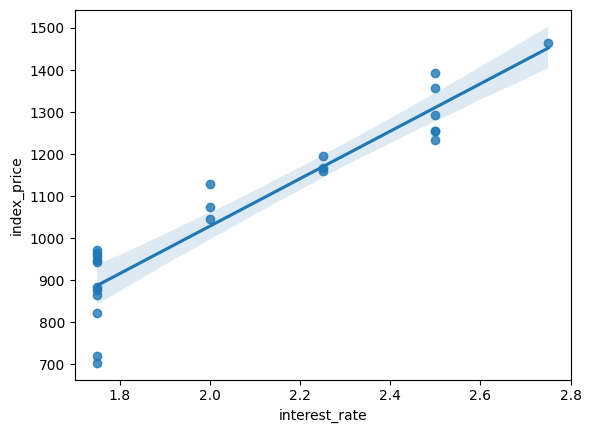

In [17]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

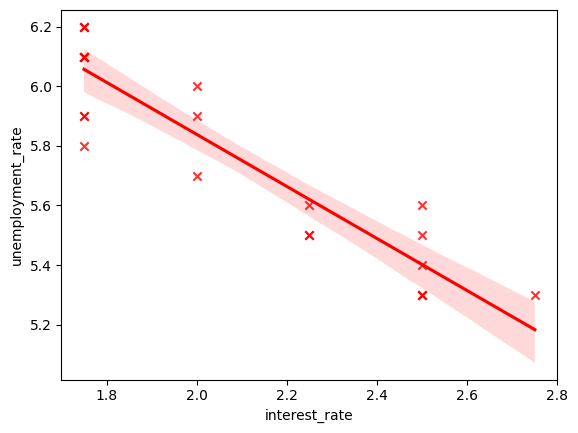

In [18]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'],marker='x',color='r')

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

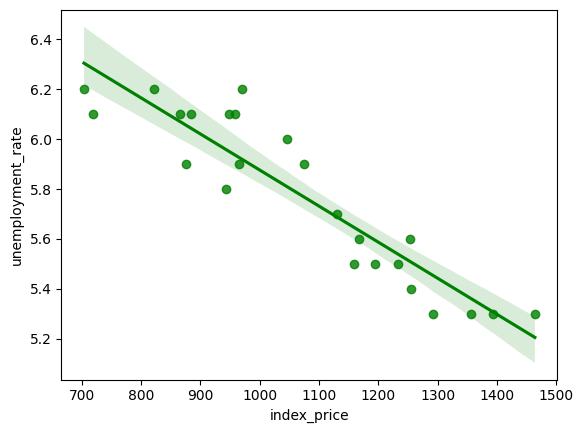

In [19]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'],color='g')

In [20]:
## Data Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.fit_transform(X_test)

In [23]:
## Model Training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [24]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
## Cross validation
from sklearn.model_selection import cross_val_score

In [26]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [27]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [28]:
y_pred=regression.predict(X_test)

In [29]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [30]:
## Performance metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [31]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('mse:',mse)
print('mae:',mae)
print('rmse:',rmse)

mse: 8108.567426306604
mae: 73.80444932337097
rmse: 90.04758423359621


In [32]:
## R^2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('r^2:',score)

r^2: 0.7591371539010257


In [33]:
## Adjusted r2
adj_r=(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('adj_r:',adj_r)

adj_r: 0.5985619231683761


## Assumptions

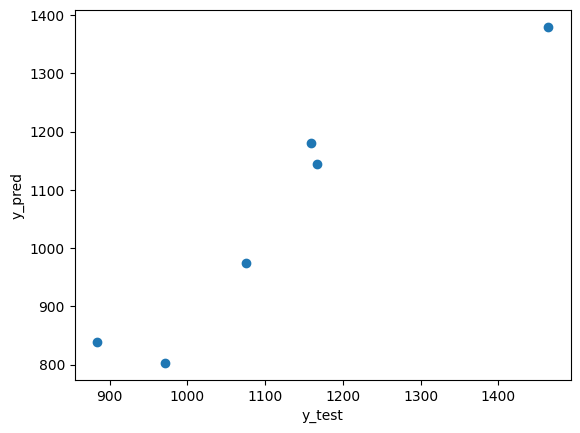

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [35]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


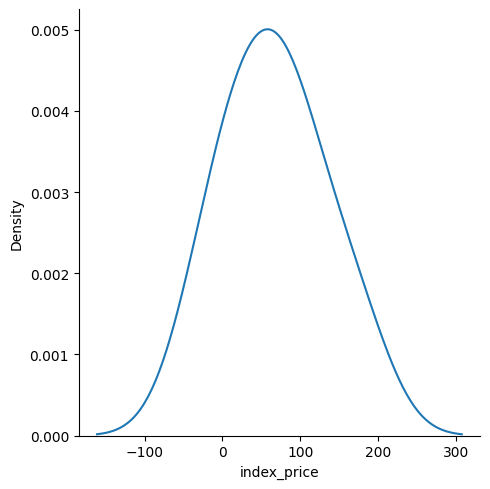

In [36]:
sns.displot(residuals,kind='kde')

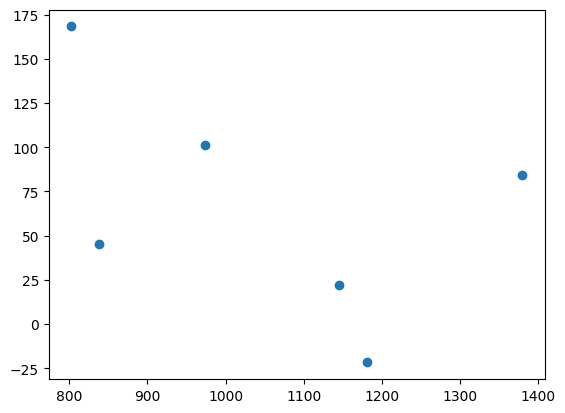

In [ ]:
plt.scatter(y_pred,residuals) # relation between them means problem in model training

In [38]:
## OLS regression
import statsmodels.api as sm


In [40]:
model=sm.OLS(y_train,X_train).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 06 Oct 2025   Prob (F-statistic):                       0.754
Time:                        22:35:43   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(regression.coef_)

[  88.27275507 -116.25716066]
